In [1]:
import torch
import gpytorch
import matplotlib.pyplot as plt
import lbg_forecast.priors_gp as gp
from astropy.io import ascii
import numpy as np

/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


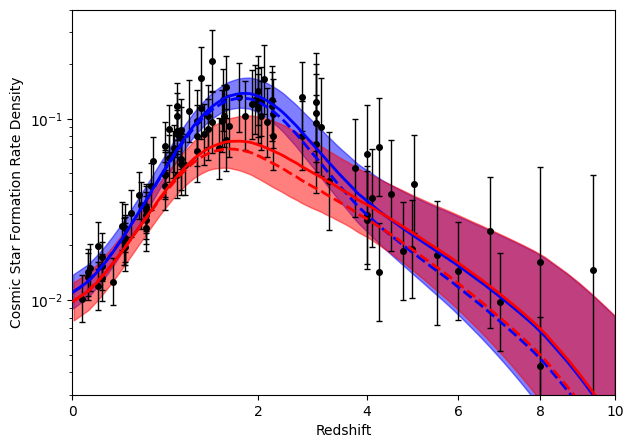

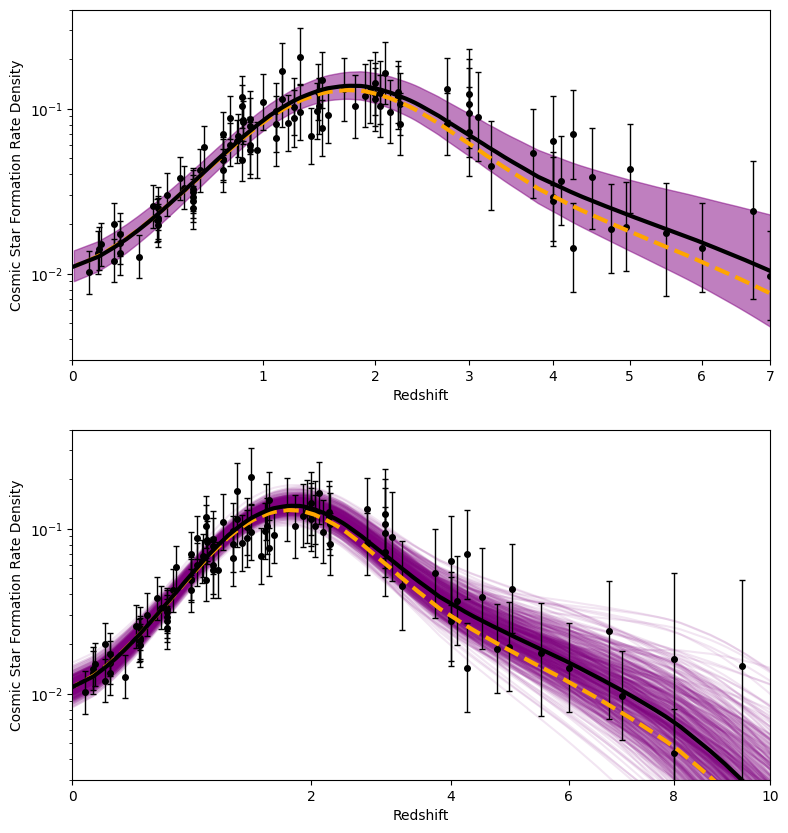

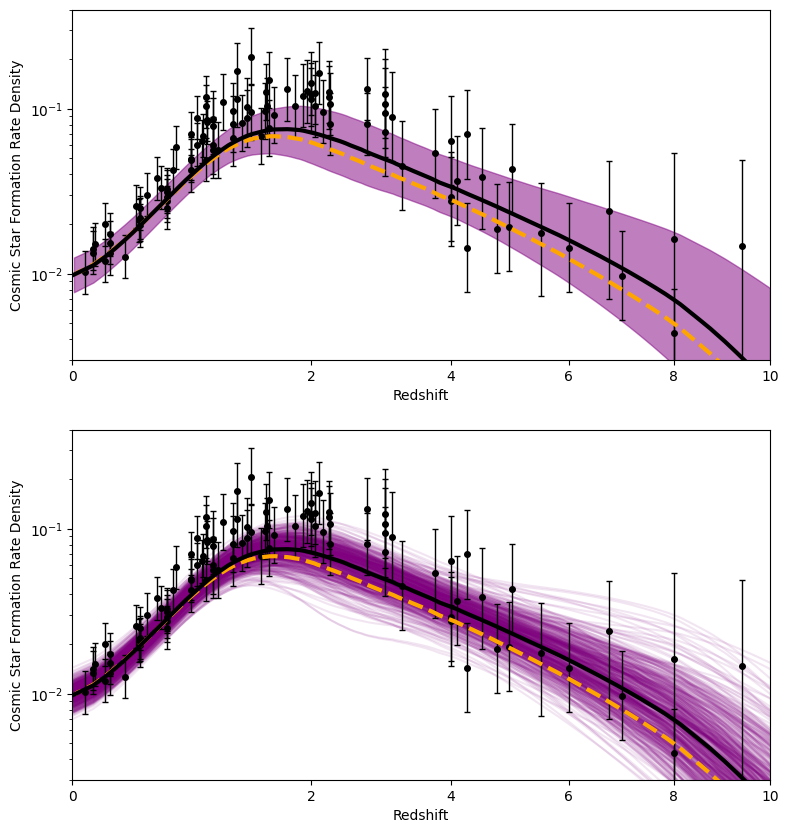

In [2]:
prior = gp.CSFRDPrior()

prior.plot_combined()
prior.plot_observed_csfrds()
prior.plot_true_csfrds()


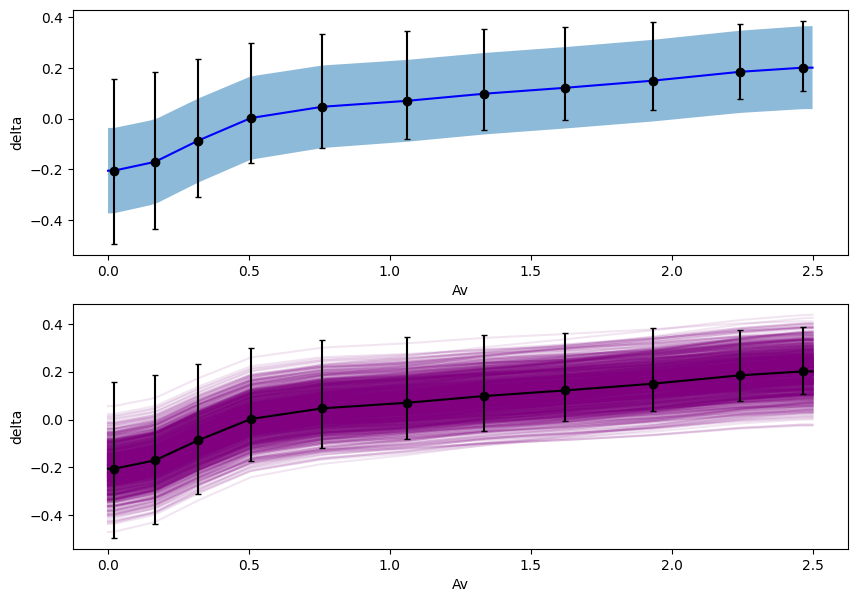

In [3]:
index_prior = gp.DustIndexPrior()
index_prior.plot_model()

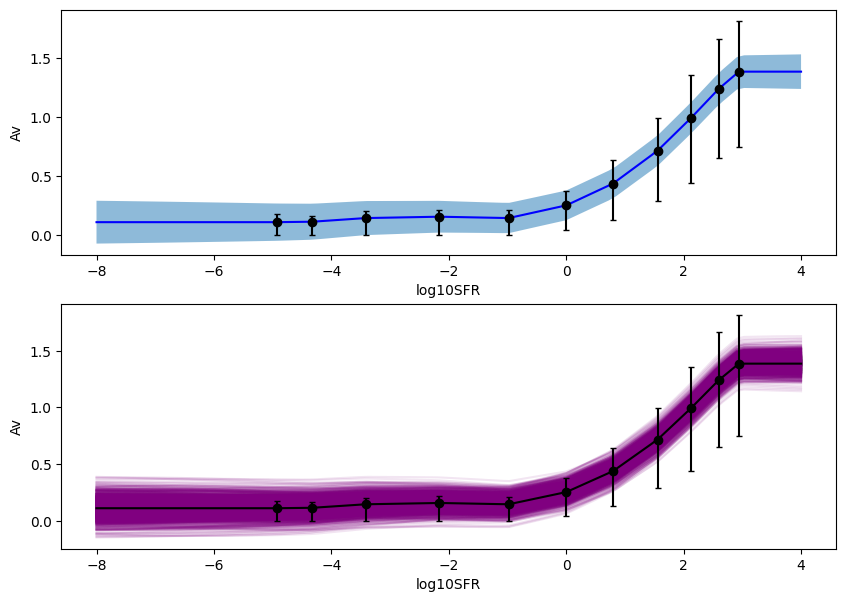

In [4]:
diffuse_dust_prior = gp.DiffuseDustPrior()
diffuse_dust_prior.plot_model()

In [5]:
def a_to_tau(a):
    return 0.92103*a
def tau_to_a(tau):
    return 1.0857*tau

def chevallard2013(tau):
    n = 2.8/(1+3*np.sqrt(tau))
    b = 0.3 - 0.05*tau
    return -1*(n+b)

def calzetti2000():
    l=0.55
    k = 2.659*(-2.156+1.509/l-0.198/(l*l)+0.011/(l*l*l))+4.05
    return k

def tau_eff_nagaraj2022(tau2):
    return -0.025*tau2*tau2+1.165*tau2-0.006
def n_eff_nagaraj2022(n):
    return -0.017*n*n+0.844*n - 0.187

def delta_to_n(delta):
    return 0.7088-0.9746*delta
def n_to_delta(n):
    return 0.72727-1.02606*n

def extract_from_file(file):
    #https://iopscience.iop.org/article/10.3847/1538-4357/aabf3c
    #and popcosmos

    data = ascii.read(file)
    av = np.array(data['x'])
    n = np.array(data['y'])
    n_err_l_val = np.array(data['yl'])
    n_err_h_val = np.array(data['yh'])
    n_err_l = n - n_err_l_val
    n_err_h = n_err_h_val - n
    n_err = n_err_l + n_err_h

    return n, av, n_err, n_err_l, n_err_h

Text(0.5, 0, 'Diffuse Dust Attenuation $A_{V}$')

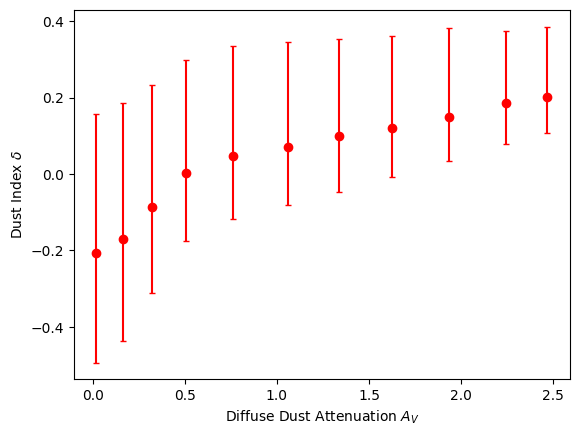

In [6]:
n_salim, av_salim, n_err_salim, n_err_l_salim, n_err_h_salim = extract_from_file("dust_data/salim2018.txt")
n_pop, av_pop, n_err_pop, n_err_l_pop, n_err_h_pop = extract_from_file("dust_data/popcosmos_data.txt")
#plt.errorbar(av_salim, n_salim, yerr=[n_err_l_salim, n_err_h_salim], fmt='bo', capsize=2)
plt.errorbar(av_pop, n_pop, yerr=[n_err_l_pop, n_err_h_pop], fmt='ro', capsize=2)
#plt.plot(np.linspace(0, 2.5, 1000), chevallard2013(np.linspace(0, 2.5, 1000)))
plt.ylabel("Dust Index $\delta$")
plt.xlabel("Diffuse Dust Attenuation $A_{V}$")

Text(0, 0.5, 'Diffuse Dust Attenuation $A_{V}$')

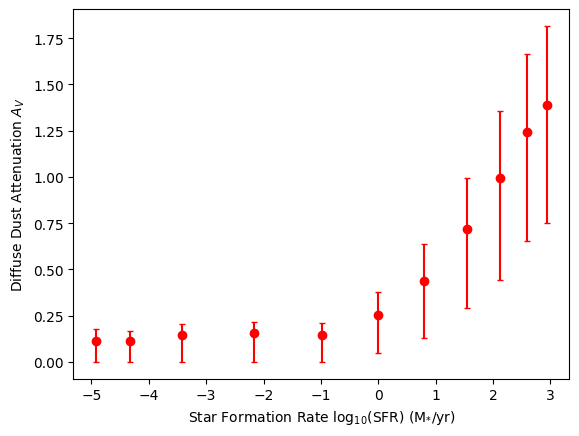

In [7]:
av_popsfr, sfr_popsfr, av_err_popsfr, av_err_l_popsfr, av_err_h_popsfr = extract_from_file("dust_data/sfr_popcosmos_data.txt")
plt.errorbar(sfr_popsfr, av_popsfr, yerr=[av_err_l_popsfr, av_err_h_popsfr], fmt='ro', capsize=2)
plt.xlabel("Star Formation Rate log$_{10}$(SFR) (M$_{*}$/yr)")
plt.ylabel("Diffuse Dust Attenuation $A_{V}$")

Trace file: /Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/duste/TraceFiles/trace_int_dust1_dust2_d1_d2_mapv2_-1_20_dlw_-1.0_eff_0_20.nc
Dat file: /Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/duste/TraceFiles/Interp_dust1_dust2_d1_d2_mapv2_-1_20_dlw_-1.0_eff_0_20_HB.dat
Measured grid length from file: 20


<ErrorbarContainer object of 3 artists>

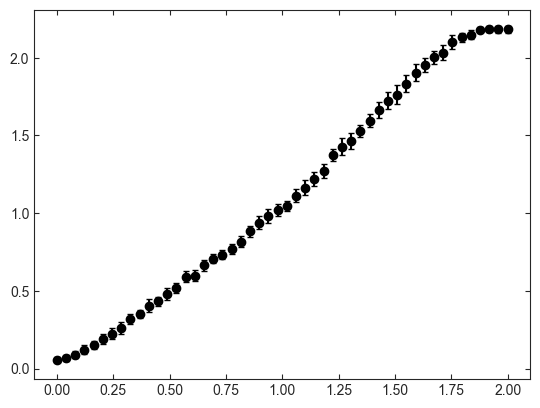

In [8]:
from duste.DustAttnCalc import DustAttnCalc
import numpy as np

d2 = np.linspace(0.0,2.0,50)
dobj = DustAttnCalc()
d1sim, _ = dobj.get_d1(d2)
d1, d1e = np.average(d1sim, axis=0), np.std(d1sim, axis=0)
#print("d1 values:", d1)
#print("d1e values:", d1e)

plt.errorbar(d2, d1, yerr =[d1e/2, d1e/2], fmt='ko', capsize=2)



Trace file: /Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/duste/TraceFiles/trace_int_logM_logSFR_logZ_z_axis_ratio_n_dust2_msfrlogZzin_d2_map_jp_new_-1_3125_dlw_0.0_eff_0_3125_small.nc
Dat file: /Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/duste/TraceFiles/Interp_logM_logSFR_logZ_z_axis_ratio_n_dust2_msfrlogZzin_d2_map_jp_new_-1_3125_dlw_0.0_eff_0_3125_HB.dat
Measured grid length from file: 5
Mins: {'logM': 8.74, 'sfr': -2.06, 'logZ': -1.7, 'z': 0.51, 'i': 0.09, 'd1': 0.01, 'd2': 0.01, 'de': 0.01}
Maxs: {'logM': 11.3, 'sfr': 2.11, 'logZ': 0.18, 'z': 2.83, 'i': 0.97, 'd1': 2.23, 'd2': 1.95, 'de': 2.19}
Trace file: /Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/duste/TraceFiles/trace_int_dust1_dust2_d1_d2_mapv2_-1_20_dlw_-1.0_eff_0_20.nc
Dat file: /Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/duste/TraceFiles/Interp_dust1_dust2_d1_d2_mapv2_-1_20_dlw_-1.0_eff_0_20_HB.dat
Measured grid length from file: 20
n: [ 9.0

<ErrorbarContainer object of 3 artists>

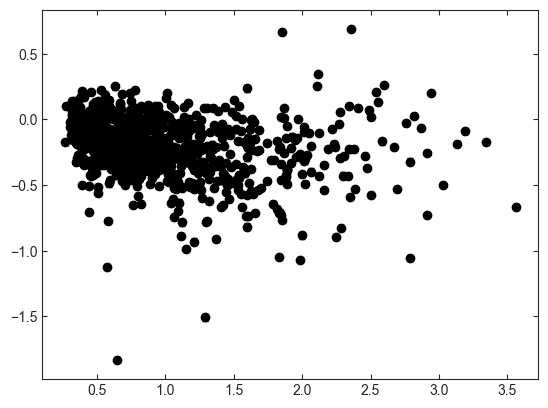

In [9]:
from duste.DustAttnCalc import DustAttnCalc
import numpy as np

d2 = np.linspace(0.0,2.0,50)
samples=1000
logm = np.random.uniform(9,11,samples)
z = np.random.uniform(0.5, 2.83, samples)
sfrs=np.random.uniform(-5, 5, samples)
i=np.random.uniform(0.09, 0.97, samples)
logz=np.random.uniform(-1.7, 0.18, samples)
dobj = DustAttnCalc(logM=logm, sfr=sfrs, i=i, z=z, logZ=logz, eff=False)
dac, dac1, navg, tauavg, d1avg, nerr, tauerr, d1err = dobj.calcDust(plot_tau=False)

plt.errorbar(tauavg, navg, yerr=[nerr/2, nerr/2], capsize=2, fmt='ko')
#plt.errorbar(d2, d1, yerr =[d1e/2, d1e/2], fmt='ko', capsize=2)

In [10]:
from astropy.io import fits
fits_image_filename = 'uncover/UNCOVER_DR2.1_SPS_catalog.fits'
hdul = fits.open(fits_image_filename)
hdul[1].data

FITS_rec([(    1, 3.6153301 , -30.46123032, 0, nan, 0.34902659, 0.8227682 , 3.96950007, 6.84016568, 7.6121674 ,  8.19232962, -1.50797485, -0.80980737, -0.16194357, 0.190589  , 1.57520357, 3.69556473, 0.11075964, 0.48040377, 1.16129948, -0.78963724, -0.30721781, 0.18349057, 0.70614955, 0.99282378, 1.2993985 , -4.29250655, -2.78276248, -1.01370092, 7.13828387e-04, 2.04204804e-02, 1.11584747e+00, 7.90004657e-04, 2.08700031e-02, 1.09824348e+00, 9.44560089e-04, 2.05244129e-02, 6.90113897e-01, 2.45671894e-11, 4.49619200e-10, 7.22435240e-09, 2.50166212e-11, 4.61435553e-10, 7.14273351e-09, 3.30176974e-11, 4.20700254e-10, 4.65619101e-09, 1.02683734, 1.15880114, 1.24721135, 27.70540098, 28.9490501 , 30.86315573, 27.40670832, 27.94606881, 28.89710027, 27.29509794, 27.49172911, 27.7852336 , 27.84362177, 29.40640321, 31.88999512, 27.53385609, 28.24572625, 29.66361455, 27.5071372 , 27.82139554, 28.24204237,  0.31812354, 1.02219718, 1.99069849, -0.18287964,  0.52072288, 1.33260585, -0.1167154 ,  0.53

<ErrorbarContainer object of 3 artists>

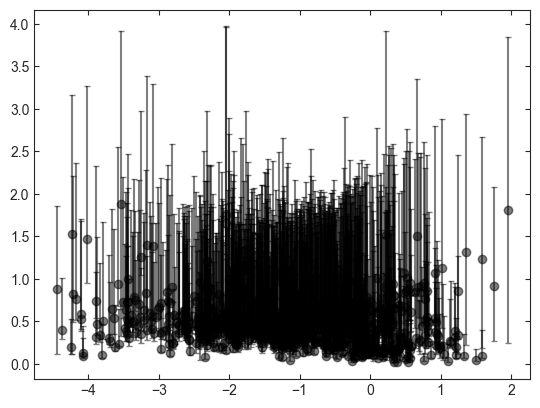

In [11]:
samples = 1000
z_50 = hdul[1].data['z_50'][:samples]

t2_16 = hdul[1].data['dust2_16'][:samples]
t2_50 = hdul[1].data['dust2_50'][:samples]
t2_84 = hdul[1].data['dust2_84'][:samples]
delta_16 = hdul[1].data['dust_index_16'][:samples]
delta_50 = hdul[1].data['dust_index_50'][:samples]
delta_84 = hdul[1].data['dust_index_84'][:samples]
sfr100_50 = hdul[1].data['sfr100_50'][:samples]
sfr100_16 = hdul[1].data['sfr100_16'][:samples]
sfr100_84 = hdul[1].data['sfr100_84'][:samples]

plt.errorbar(np.log10(sfr100_50), t2_50, yerr=[t2_16, t2_84], fmt='ko', capsize=2, alpha=0.5)